In [236]:
import pandas as pd

data_path = 'CM_logD_regression.xlsx'

elements = ["Mn", "Co", "Ni", "Cu"]


df = pd.read_excel(data_path, sheet_name="combined_new")
# Remove rows with NaN values
df = df.dropna()

# Reset index after dropping NaN values
df = df.reset_index(drop=True)
# # scale each column by doing df[col] = df[col] / abs(df[col]).max()

sf_dict = {}
for col in df.columns:
    scaled_column_name = f"{col}_scaled"
    if df[col].dtype in ['float64', 'int64']:
        if col in ["pH", "[D2EHPA] ", "log D (obs)_Mn", "log D (obs)_Co", "log D (obs)_Ni", "log D (obs)_Cu"]:
            max_value = 1
            df[scaled_column_name] = df[col] / max_value
        else:
            # if col in ["[Mn] (mol/L)", "[Co] (mol/L)", "[Ni] (mol/L)", "[Cu] (mol/L)"]:
            #     df[scaled_column_name] =  (df[col] - df[col].mean() )  / (df[col].max() - df[col].min() )    
            # else:
            max_value = abs(df[col]).max()
            df[scaled_column_name] = df[col] / max_value

        sf_dict[col] = max_value
        print(f"Scaled {col} by {max_value}")



Scaled pH by 1
Scaled A/O by 2.61
Scaled [D2EHPA]  by 1
Scaled extraction_Mn by 99.97
Scaled extraction_Co by 70.91
Scaled extraction_Ni by 43.58
Scaled extraction_Cu by 96.59
Scaled Dobs_Mn by 4998.499999999811
Scaled Dobs_Co by 3.0813008130081303
Scaled Dobs_Ni by 1.2164683177870699
Scaled Dobs_Cu by 41.60344827586202
Scaled log D (obs)_Mn by 1
Scaled log D (obs)_Co by 1
Scaled log D (obs)_Ni by 1
Scaled log D (obs)_Cu by 1
Scaled [Mn] (mol/L) by 0.19
Scaled [Co] (mol/L) by 5.6e-05
Scaled [Ni] (mol/L) by 0.00014
Scaled [Cu] (mol/L) by 0.000189


## Some extra data points were removed 

In [237]:
df

,pH,A/O,[D2EHPA],extraction_Mn,extraction_Co,extraction_Ni,extraction_Cu,Dobs_Mn,Dobs_Co,Dobs_Ni,...,Dobs_Ni_scaled,Dobs_Cu_scaled,log D (obs)_Mn_scaled,log D (obs)_Co_scaled,log D (obs)_Ni_scaled,log D (obs)_Cu_scaled,[Mn] (mol/L)_scaled,[Co] (mol/L)_scaled,[Ni] (mol/L)_scaled,[Cu] (mol/L)_scaled
0,3.86,2.00,0.15,11.69,6.10,6.18,37.44,0.264749,0.129925,0.131742,...,0.108298,0.028770,-0.577165,-0.886306,-0.880277,0.078069,0.736842,1.000000,1.000000,0.740741
1,3.53,1.00,0.35,87.23,36.73,30.81,93.83,6.830854,0.580528,0.445296,...,0.366056,0.365534,0.834475,-0.236177,-0.351352,1.182057,0.736842,1.000000,1.000000,0.317460
2,2.59,2.00,0.15,16.69,6.33,3.95,16.41,0.400672,0.135155,0.082249,...,0.067613,0.009437,-0.397211,-0.869167,-1.084870,-0.406016,0.736842,1.000000,1.000000,0.740741
3,3.06,1.00,0.35,87.57,27.65,5.80,83.19,7.045052,0.382170,0.061571,...,0.050615,0.118953,0.847884,-0.417743,-1.210623,0.694503,0.736842,0.428571,1.000000,0.740741
4,3.54,1.00,0.15,88.85,31.68,13.02,80.80,7.968610,0.463700,0.149690,...,0.123053,0.101153,0.901383,-0.333763,-0.824808,0.624110,0.315789,1.000000,0.428571,0.740741
5,2.50,2.00,0.15,2.53,5.30,3.60,20.34,0.051913,0.111932,0.074689,...,0.061398,0.012275,-1.284720,-0.951044,-1.126745,-0.291859,0.736842,0.428571,1.000000,0.317460
6,2.50,2.00,0.35,31.68,16.14,8.69,56.60,0.927400,0.384927,0.190341,...,0.156470,0.062694,-0.032733,-0.414621,-0.720469,0.416357,0.315789,1.000000,1.000000,0.317460
7,3.54,1.00,0.35,71.67,24.71,7.61,82.72,2.529827,0.328198,0.082368,...,0.067711,0.115063,0.403091,-0.483865,-1.084240,0.680067,0.736842,1.000000,0.428571,0.740741
8,3.51,2.00,0.15,37.95,22.18,16.83,64.64,1.223207,0.570033,0.404713,...,0.332695,0.087880,0.087500,-0.244100,-0.392853,0.563019,0.315789,0.428571,1.000000,0.317460
9,2.56,1.00,0.35,99.38,44.25,25.13,85.06,160.290323,0.793722,0.335648,...,0.275920,0.136850,2.204907,-0.100332,-0.474115,0.755375,0.315789,1.000000,1.000000,0.317460


In [238]:
# remove row 27 and reindex

df = df.drop(index=29)  # A/O is much lower than other cases
df = df.drop(index=27)  # [DEH2PA] is suspect (Much lower than other cases)
df = df.drop(index=21)  # Ni log D is suspect (based on residual plot)
df = df.drop(index=23)
df = df.drop(index=1)
df = df.drop(index=9)
df = df.reset_index(drop=True)


# Drop other suspect rows based on where we hit the lower bound
# These dont work as well.
# df = df.drop(index=0)
# df = df.drop(index=3)
# df = df.drop(index=10)

# df = df.reset_index(drop=True)

In [239]:
df

,pH,A/O,[D2EHPA],extraction_Mn,extraction_Co,extraction_Ni,extraction_Cu,Dobs_Mn,Dobs_Co,Dobs_Ni,...,Dobs_Ni_scaled,Dobs_Cu_scaled,log D (obs)_Mn_scaled,log D (obs)_Co_scaled,log D (obs)_Ni_scaled,log D (obs)_Cu_scaled,[Mn] (mol/L)_scaled,[Co] (mol/L)_scaled,[Ni] (mol/L)_scaled,[Cu] (mol/L)_scaled
0,3.86,2.00,0.15,11.69,6.10,6.18,37.44,0.264749,0.129925,0.131742,...,0.108298,0.028770,-0.577165,-0.886306,-0.880277,0.078069,0.736842,1.000000,1.000000,0.740741
1,2.59,2.00,0.15,16.69,6.33,3.95,16.41,0.400672,0.135155,0.082249,...,0.067613,0.009437,-0.397211,-0.869167,-1.084870,-0.406016,0.736842,1.000000,1.000000,0.740741
2,3.06,1.00,0.35,87.57,27.65,5.80,83.19,7.045052,0.382170,0.061571,...,0.050615,0.118953,0.847884,-0.417743,-1.210623,0.694503,0.736842,0.428571,1.000000,0.740741
3,3.54,1.00,0.15,88.85,31.68,13.02,80.80,7.968610,0.463700,0.149690,...,0.123053,0.101153,0.901383,-0.333763,-0.824808,0.624110,0.315789,1.000000,0.428571,0.740741
4,2.50,2.00,0.15,2.53,5.30,3.60,20.34,0.051913,0.111932,0.074689,...,0.061398,0.012275,-1.284720,-0.951044,-1.126745,-0.291859,0.736842,0.428571,1.000000,0.317460
5,2.50,2.00,0.35,31.68,16.14,8.69,56.60,0.927400,0.384927,0.190341,...,0.156470,0.062694,-0.032733,-0.414621,-0.720469,0.416357,0.315789,1.000000,1.000000,0.317460
6,3.54,1.00,0.35,71.67,24.71,7.61,82.72,2.529827,0.328198,0.082368,...,0.067711,0.115063,0.403091,-0.483865,-1.084240,0.680067,0.736842,1.000000,0.428571,0.740741
7,3.51,2.00,0.15,37.95,22.18,16.83,64.64,1.223207,0.570033,0.404713,...,0.332695,0.087880,0.087500,-0.244100,-0.392853,0.563019,0.315789,0.428571,1.000000,0.317460
8,2.67,2.00,0.15,21.44,5.44,20.90,10.65,0.545825,0.115059,0.528445,...,0.434409,0.005730,-0.262947,-0.939079,-0.277000,-0.622715,0.736842,1.000000,0.428571,0.740741
9,2.51,1.00,0.35,22.90,15.20,10.46,60.66,0.297017,0.179245,0.116819,...,0.096032,0.037063,-0.527219,-0.746552,-0.932485,0.188068,0.736842,0.428571,0.428571,0.317460


In [240]:
n_data = df.shape[0]

from idaes.core.util import model_statistics as mstat
import pyomo.environ as pyo
import numpy as np

m = pyo.ConcreteModel()

m.I = pyo.RangeSet(0, n_data-1)
m.elements = pyo.Set(initialize = elements)

# Input data vars
m.pH = pyo.Var(m.I, domain=pyo.Reals, initialize=0.0)
m.C_ex = pyo.Var(m.I, domain=pyo.Reals, initialize=0.0)
m.Cfeed = pyo.Var(m.I, m.elements, domain=pyo.Reals, initialize=0.0)


# Output variable
m.logD = pyo.Var(m.I, m.elements, domain=pyo.Reals, initialize=0.0)


# Parameters
ablist = [1, 2, 3, 4, 5, 6]

ai_list = [3, 4, 5, 6, 7]
bi_list = [1, 2]
ci_list = [1, 2, 3, 4]
di_list = [1, 2, 3, 4]

m.a_set = pyo.Set(initialize = ablist)
m.b_set = pyo.Set(initialize = ablist)

m.ai_set = pyo.Set(initialize = ai_list)
m.bi_set = pyo.Set(initialize = bi_list)
m.ci_set = pyo.Set(initialize = ci_list)
m.di_set = pyo.Set(initialize = di_list)

m.a12 = pyo.Var(m.a_set, m.elements, domain=pyo.Reals, initialize=0.5)
m.b12 = pyo.Var(m.b_set, m.elements, domain=pyo.Reals, initialize=0.5)
m.c12 = pyo.Var(m.ci_set, m.elements, domain=pyo.Reals, initialize=0.5)
m.d12 = pyo.Var(m.di_set, m.elements, domain=pyo.Reals, initialize=0.0)

m.ai = pyo.Var(m.ai_set, domain=pyo.NonNegativeReals, initialize=0.5)

m.alpha = pyo.Var(m.I, m.elements, domain=pyo.Reals, initialize=0.5)
m.beta = pyo.Var(m.I, m.elements, domain=pyo.Reals, initialize=0.5)

name_mapper_general = {
    'pH_scaled': m.pH,
    '[D2EHPA] _scaled': m.C_ex}


def map_generator(element):
    return {
    f'[{element}] (mol/L)_scaled': m.Cfeed,
    f'log D (obs)_{element}_scaled': m.logD}



name_mapper_elements = {}

for element in m.elements:
    name_mapper_elements[element] = map_generator(element)


# # Initialize input variables
for col in name_mapper_general.keys():
    for i in df.index:
        name_mapper_general[col][i].fix(df[col][i])


for element in m.elements:
    for i in df.index:
        for col in name_mapper_elements[element].keys():
            name_mapper_elements[element][col][i, element].fix(df[col][i])
        
# # Model variales

m.logD_scaled_pred =  pyo.Var(m.I, m.elements, initialize = 0.1, domain=pyo.Reals)
m.Cext_net_pred = pyo.Var(m.I, domain=pyo.Reals, initialize=0.1, bounds = (1e-3, 2))
m.logCext_net_pred = pyo.Var(m.I, domain=pyo.Reals, initialize=0.1, bounds = (np.log10(1e-10), np.log10(2)))



# Constraints

@m.Constraint(m.I)
def logCext_net_pred_constraint(m, i):
    return 10**(m.logCext_net_pred[i]) == m.Cext_net_pred[i]


m.resid = pyo.Var(m.I, m.elements)

@m.Constraint(m.I, m.elements)
def alpha_const(m, i, e):
    linear_term = m.a12[3, e]*m.Cfeed[i, "Mn"] + m.a12[4, e]*m.Cfeed[i, "Co"] +  m.a12[5, e]*m.Cfeed[i, "Ni"] + m.a12[6, e]*m.Cfeed[i, "Cu"]
    quad_term = m.c12[4, e]*m.Cfeed[i, "Cu"]**2 + m.c12[3, e]*m.Cfeed[i, "Ni"]**2 + m.c12[1, e]*m.Cfeed[i, "Mn"]**2 #+ m.c12[2, e]*m.Cfeed[i, "Co"]**2
    cube_term = m.d12[1, e]*m.Cfeed[i, "Mn"]**3 + m.d12[2, e]*m.Cfeed[i, "Co"]**3 + m.d12[3, e]*m.Cfeed[i, "Ni"]**3 + m.d12[4, e]*m.Cfeed[i, "Cu"]**3
    return (m.alpha[i, e] - m.a12[1, e]  + m.a12[2, e]*m.C_ex[i] 
            + linear_term 
            + quad_term 
            # + cube_term
            ) == 0

@m.Constraint(m.I, m.elements)
def b_const(m, i, e):
    return m.beta[i, e] == m.b12[1, e] + m.b12[2, e]*m.logCext_net_pred[i]

@m.Constraint(m.I)
def Cext_net_pred_constraint(m, i):
    return m.Cext_net_pred[i] == m.C_ex[i] - m.ai[3]*m.Cfeed[i, "Mn"] - m.ai[4]*m.Cfeed[i, "Co"]  -m.ai[5]*m.Cfeed[i, "Cu"] - m.ai[6]*m.Cfeed[i, "Ni"] - m.ai[7]

@m.Constraint(m.I)
def Cext_net_value_constraint(m, i):
    return  m.C_ex[i] - m.Cext_net_pred[i]>=0

@m.Constraint(m.I, m.elements)
def logD_scaled_pred_constraint(m, i, e):
    return m.logD_scaled_pred[i, e] == m.alpha[i, e]*m.pH[i] + m.beta[i, e]

@m.Objective(sense = pyo.minimize)
def objective_function(m):
    return sum((m.logD_scaled_pred[i, e] - m.logD[i, e])**2 for i in m.I for e in m.elements)

# contributing terms
@m.Expression(m.elements)
def sse_element(m, e):
    return sum((m.logD_scaled_pred[i, e] - m.logD[i, e])**2 for i in m.I)


@m.Expression(m.I, m.elements)
def D(m, i, e):
    return 10**m.logD_scaled_pred[i, e]

@m.Expression(m.I, m.elements)
def extraction_perc(m, i, e):
    A_O = df["A/O"][i]

    return m.D[i,e] / (m.D[i,e] + A_O) *100

print(n_data)
print(mstat.degrees_of_freedom(m))
solver = pyo.SolverFactory('ipopt_v2')
solver.options['halt_on_ampl_error'] = 'no'
solver.options['max_iter'] = 200

results = solver.solve(m, tee=True, symbolic_solver_labels=True)

28
49
Ipopt 3.13.2: halt_on_ampl_error=no
max_iter=200


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale sc

In [241]:
m.objective_function()/n_data

np.float64(0.2129475722211935)

In [242]:
m.Cext_net_pred.pprint()

Cext_net_pred : Size=28, Index=I
    Key : Lower : Value                : Upper : Fixed : Stale : Domain
      0 : 0.001 :                0.001 :     2 : False : False :  Reals
      1 : 0.001 :                0.001 :     2 : False : False :  Reals
      2 : 0.001 :  0.20100001324522532 :     2 : False : False :  Reals
      3 : 0.001 :   0.0533244832770885 :     2 : False : False :  Reals
      4 : 0.001 : 0.033818369266476606 :     2 : False : False :  Reals
      5 : 0.001 :   0.2861428449986239 :     2 : False : False :  Reals
      6 : 0.001 :  0.20099999016643783 :     2 : False : False :  Reals
      7 : 0.001 :   0.0861428623771273 :     2 : False : False :  Reals
      8 : 0.001 :                0.001 :     2 : False : False :  Reals
      9 : 0.001 :  0.23381836356619265 :     2 : False : False :  Reals
     10 : 0.001 : 0.053324506355875885 :     2 : False : False :  Reals
     11 : 0.001 :  0.08614283929833992 :     2 : False : False :  Reals
     12 : 0.001 : 0.03381836926

In [243]:
m.logD[:, 'Ni'].pprint()

{Member of logD} : Size=112, Index=I*elements
    Key       : Lower : Value               : Upper : Fixed : Stale : Domain
    (0, 'Ni') :  None : -0.8802769578583425 :  None :  True :  True :  Reals
{Member of logD} : Size=112, Index=I*elements
    Key       : Lower : Value              : Upper : Fixed : Stale : Domain
    (1, 'Ni') :  None : -1.084870277907271 :  None :  True :  True :  Reals
{Member of logD} : Size=112, Index=I*elements
    Key       : Lower : Value             : Upper : Fixed : Stale : Domain
    (2, 'Ni') :  None : -1.21062290922994 :  None :  True :  True :  Reals
{Member of logD} : Size=112, Index=I*elements
    Key       : Lower : Value              : Upper : Fixed : Stale : Domain
    (3, 'Ni') :  None : -0.824808419097144 :  None :  True :  True :  Reals
{Member of logD} : Size=112, Index=I*elements
    Key       : Lower : Value               : Upper : Fixed : Stale : Domain
    (4, 'Ni') :  None : -1.1267445374715623 :  None :  True :  True :  Reals
{Member 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43492\2415438403.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


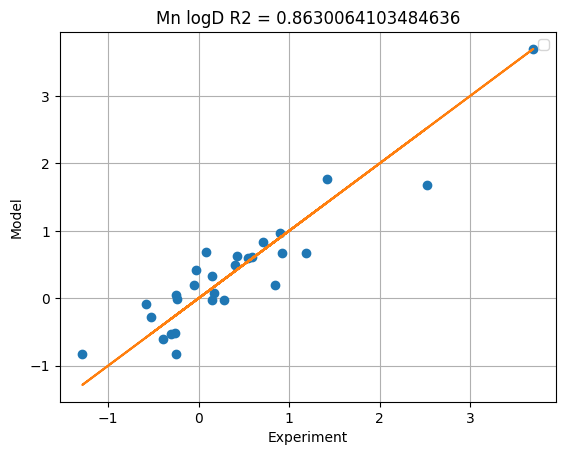

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43492\2415438403.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


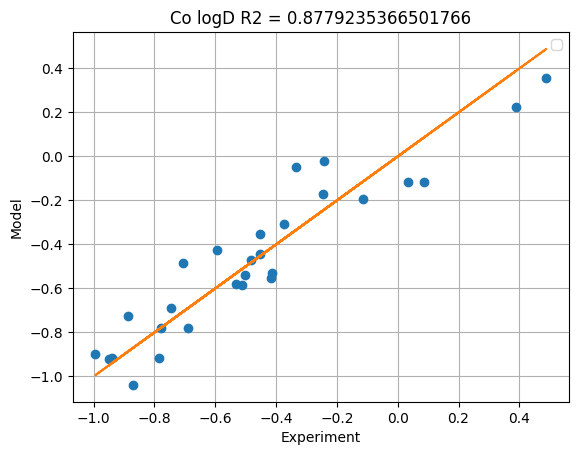

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43492\2415438403.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


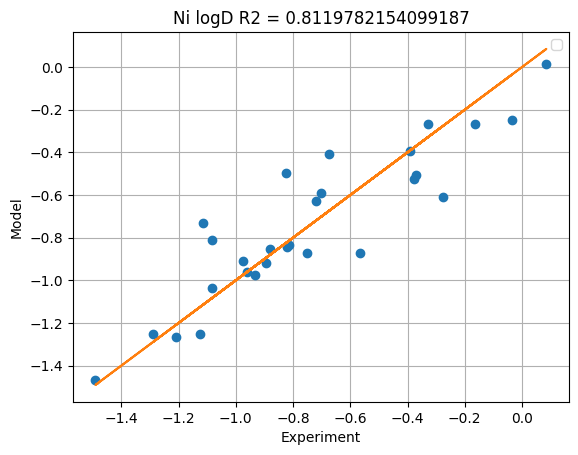

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43492\2415438403.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


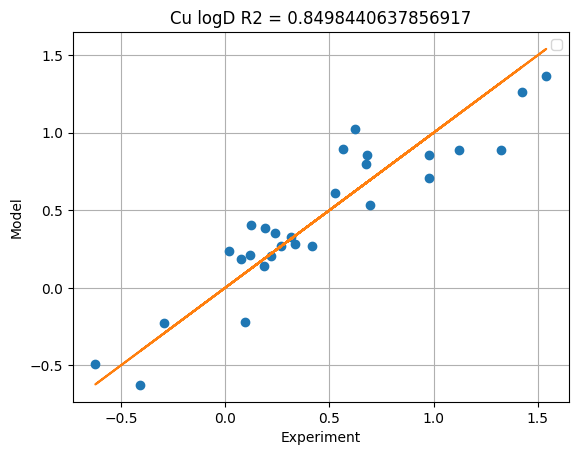

In [244]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

for element in m.elements:
    # for i in m.I:
        # if 0.0 <= m.logD_scaled_pred[i,element]() <= 0.2:
    plt.plot(m.logD[:, element](), m.logD_scaled_pred[:,element](), 'o')#, label=f'{i}')
    plt.plot(m.logD[:, element](), m.logD[:, element]())
    plt.xlabel(f'Experiment')
    plt.ylabel('Model')
    plt.grid()
    plt.title(f'{element} logD R2 = {r2_score(m.logD[:, element](), m.logD_scaled_pred[:,element]())}')
    plt.legend()
    plt.show()

In [245]:
for i in pyo.RangeSet(0,n_data-1):
    print(f'exp : {m.logD[i, 'Mn']()}, model : {m.logD_scaled_pred[i, 'Mn']()}')

exp : -0.5771653779399436, model : -0.09141306545911566
exp : -0.39721080212669213, model : -0.608600329559949
exp : 0.8478842210660318, model : 0.2030047055139803
exp : 0.9013825647571406, model : 0.9645659467927208
exp : -1.284720449224846, model : -0.8235718507791235
exp : -0.03273268909951155, model : 0.4168930001548099
exp : 0.4030908299491032, model : 0.49997941360375586
exp : 0.08749999006073181, model : 0.6927173450051645
exp : -0.26294669809417964, model : -0.5098576512160057
exp : -0.527218895711069, model : -0.2720270128267786
exp : -0.0556657792209242, model : 0.19340704244632528
exp : 1.191906069484436, model : 0.6736273417462766
exp : -0.24724076597851302, model : -0.8199337836573909
exp : 0.9231832334919453, model : 0.6736273417462765
exp : 0.15263767684164384, model : 0.32532977894515586
exp : 1.4191059391024101, model : 1.762711959333555
exp : 0.7079783689468605, model : 0.8312124068877865
exp : 2.5276080578193056, model : 1.6850052389017487
exp : 0.5931574385275287, m

In [246]:
df

,pH,A/O,[D2EHPA],extraction_Mn,extraction_Co,extraction_Ni,extraction_Cu,Dobs_Mn,Dobs_Co,Dobs_Ni,...,Dobs_Ni_scaled,Dobs_Cu_scaled,log D (obs)_Mn_scaled,log D (obs)_Co_scaled,log D (obs)_Ni_scaled,log D (obs)_Cu_scaled,[Mn] (mol/L)_scaled,[Co] (mol/L)_scaled,[Ni] (mol/L)_scaled,[Cu] (mol/L)_scaled
0,3.86,2.00,0.15,11.69,6.10,6.18,37.44,0.264749,0.129925,0.131742,...,0.108298,0.028770,-0.577165,-0.886306,-0.880277,0.078069,0.736842,1.000000,1.000000,0.740741
1,2.59,2.00,0.15,16.69,6.33,3.95,16.41,0.400672,0.135155,0.082249,...,0.067613,0.009437,-0.397211,-0.869167,-1.084870,-0.406016,0.736842,1.000000,1.000000,0.740741
2,3.06,1.00,0.35,87.57,27.65,5.80,83.19,7.045052,0.382170,0.061571,...,0.050615,0.118953,0.847884,-0.417743,-1.210623,0.694503,0.736842,0.428571,1.000000,0.740741
3,3.54,1.00,0.15,88.85,31.68,13.02,80.80,7.968610,0.463700,0.149690,...,0.123053,0.101153,0.901383,-0.333763,-0.824808,0.624110,0.315789,1.000000,0.428571,0.740741
4,2.50,2.00,0.15,2.53,5.30,3.60,20.34,0.051913,0.111932,0.074689,...,0.061398,0.012275,-1.284720,-0.951044,-1.126745,-0.291859,0.736842,0.428571,1.000000,0.317460
5,2.50,2.00,0.35,31.68,16.14,8.69,56.60,0.927400,0.384927,0.190341,...,0.156470,0.062694,-0.032733,-0.414621,-0.720469,0.416357,0.315789,1.000000,1.000000,0.317460
6,3.54,1.00,0.35,71.67,24.71,7.61,82.72,2.529827,0.328198,0.082368,...,0.067711,0.115063,0.403091,-0.483865,-1.084240,0.680067,0.736842,1.000000,0.428571,0.740741
7,3.51,2.00,0.15,37.95,22.18,16.83,64.64,1.223207,0.570033,0.404713,...,0.332695,0.087880,0.087500,-0.244100,-0.392853,0.563019,0.315789,0.428571,1.000000,0.317460
8,2.67,2.00,0.15,21.44,5.44,20.90,10.65,0.545825,0.115059,0.528445,...,0.434409,0.005730,-0.262947,-0.939079,-0.277000,-0.622715,0.736842,1.000000,0.428571,0.740741
9,2.51,1.00,0.35,22.90,15.20,10.46,60.66,0.297017,0.179245,0.116819,...,0.096032,0.037063,-0.527219,-0.746552,-0.932485,0.188068,0.736842,0.428571,0.428571,0.317460


C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43492\2961781852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


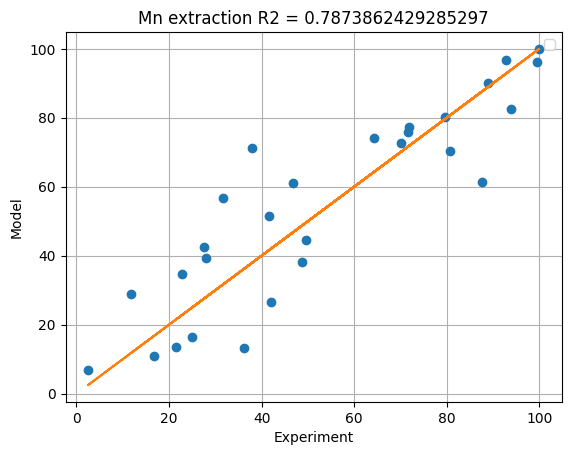

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43492\2961781852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


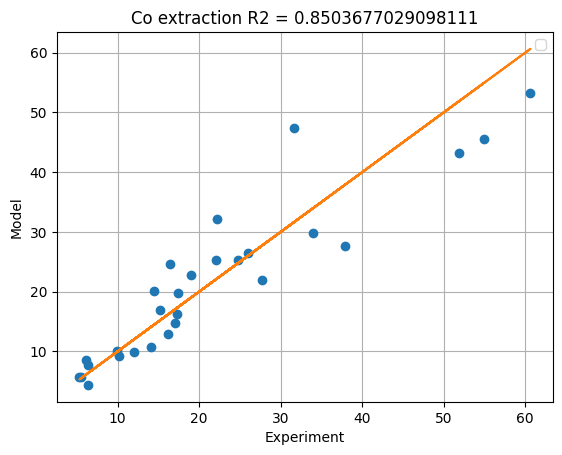

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43492\2961781852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


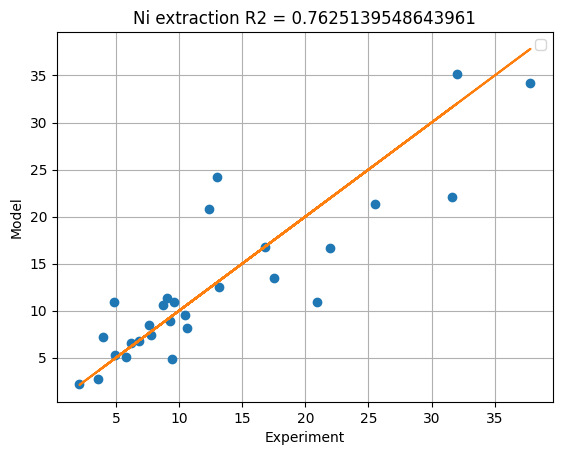

C:\Users\ad00105\AppData\Local\Temp\1\ipykernel_43492\2961781852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


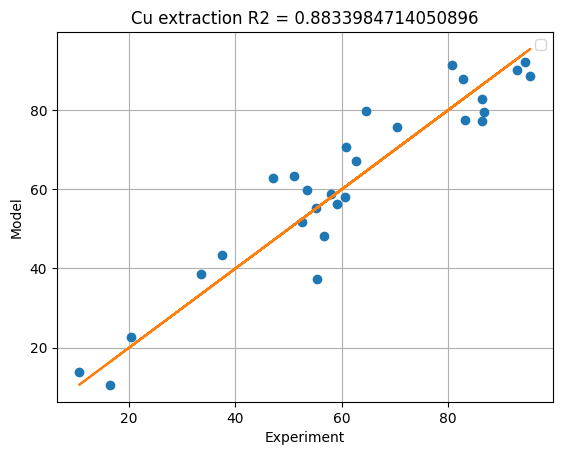

In [247]:
for element in m.elements:
    plt.plot(df[f"extraction_{element}"], m.extraction_perc[:, element](), 'o')
    plt.plot(df[f"extraction_{element}"], df[f"extraction_{element}"])
    plt.plot()
    plt.xlabel('Experiment')
    plt.ylabel('Model')
    plt.grid()
    plt.title(f'{element} extraction R2 = {r2_score(df[f"extraction_{element}"], m.extraction_perc[:, element]())}')
    plt.legend()
    plt.show()

In [248]:
from sklearn.metrics import r2_score

R_2_logD_values = {}
R_2_extract_values = {}
for element in m.elements:
    R_2_logD_values[element] = r2_score(m.logD[:, element](), m.logD_scaled_pred[:,element]())
    R_2_extract_values[element] = r2_score(df[f"extraction_{element}"], m.extraction_perc[:, element]())

print(R_2_logD_values)
print(R_2_extract_values)

{'Mn': 0.8630064103484636, 'Co': 0.8779235366501766, 'Ni': 0.8119782154099187, 'Cu': 0.8498440637856917}
{'Mn': 0.7873862429285297, 'Co': 0.8503677029098111, 'Ni': 0.7625139548643961, 'Cu': 0.8833984714050896}


In [249]:
df.to_excel("debug_data.xlsx")

PermissionError: [Errno 13] Permission denied: 'debug_data.xlsx'

In [252]:
scale = {1:0.19, 2:5.6e-5, 3:0.00014, 4:0.000189, 5:1}
for element in m.elements:
    print(f"{element} a121, a122 = {m.a12[1, element]()}, {m.a12[2, element]()}")
    print(f"{element} a123, a124, a125, a126 = {m.a12[3, element]()/scale[1]}, {m.a12[4, element]()/scale[2]}, {m.a12[5, element]()/scale[3]}, {m.a12[6, element]()/scale[4]}")
    print(f"{element} c121, c123, c124 = {m.c12[1, element]()/scale[1]**2}, {m.c12[3, element]()/scale[3]**2}, {m.c12[4, element]()/scale[4]**2}")
    print(f"{element} b12, b12 = {m.b12[:, element]()}")
for s in scale:    
    print(f"ai({s}): {m.ai[s+2]()/scale[s]}")

Mn a121, a122 = 1.2921757594269832, -1.0438480756686428
Mn a123, a124, a125, a126 = 10.657900868347188, 882.6583480499527, 7674.208143232156, -3043.5791784949106
Mn c121, c123, c124 = -32.5030537775295, -36822261.68710207, 10738369.568383267
Mn b12, b12 = [-1.8001810339579554, -0.04561479700127355, 0.5, 0.5, 0.5, 0.5]
Co a121, a122 = 0.8954495449630494, -0.23960286450413992
Co a123, a124, a125, a126 = -6.5799191211144406, 2045.4933402184033, 16959.123155008187, -2403.7017355429
Co c121, c123, c124 = 43.51747358214018, -82337296.79941513, 11012933.49970206
Co b12, b12 = [-1.640906555085726, 0.011068947443407176, 0.5, 0.5, 0.5, 0.5]
Ni a121, a122 = 0.6315374873518447, -1.030785785209273
Ni a123, a124, a125, a126 = -6.869551027535319, 1215.3621535922466, 13182.937775170858, -1512.6692370134472
Ni c121, c123, c124 = 51.49223752220932, -61158619.43283061, 13802233.015912594
Ni b12, b12 = [-2.270451790582356, -0.5170464712967734, 0.5, 0.5, 0.5, 0.5]
Cu a121, a122 = 1.4047790199602534, -0.025

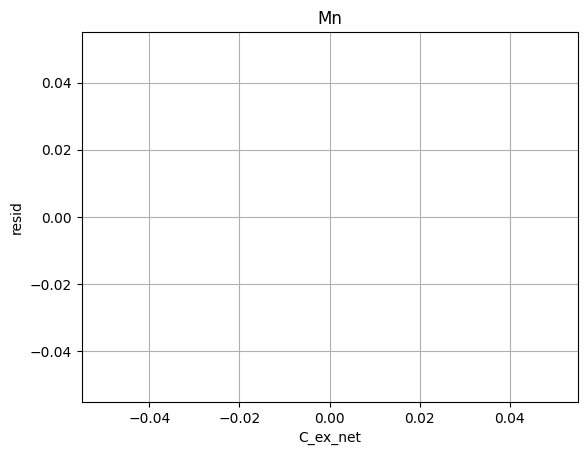

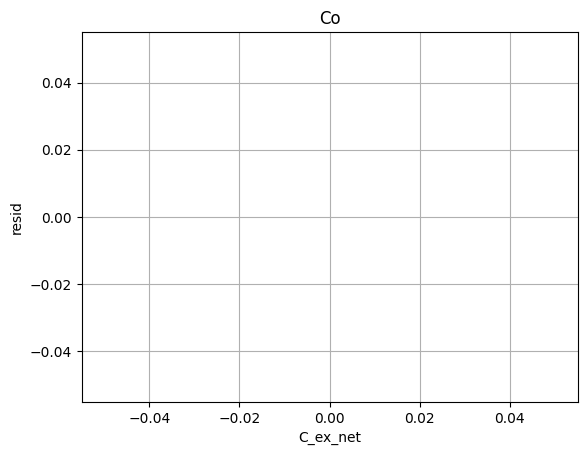

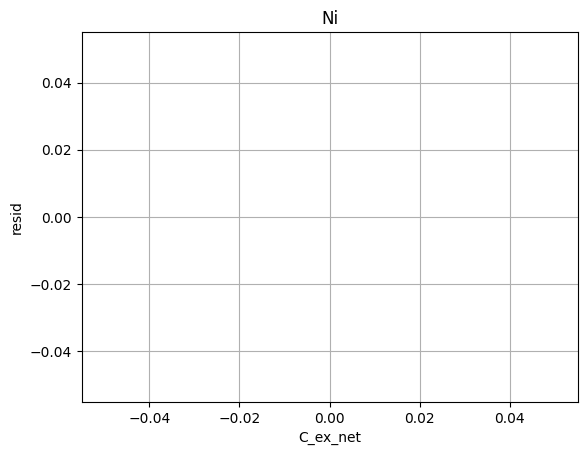

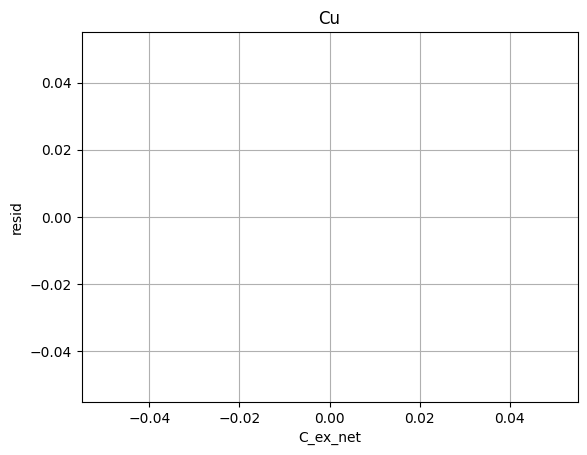

In [ ]:
for element in m.elements:
    plt.plot(m.Cext_net_pred[:](), m.resid[:,element](), 'o')
    plt.xlabel(f'C_ex_net')
    plt.ylabel('resid')
    plt.grid()
    plt.title(element)
    plt.show()

# Residual plots (for a = a1 + resid)

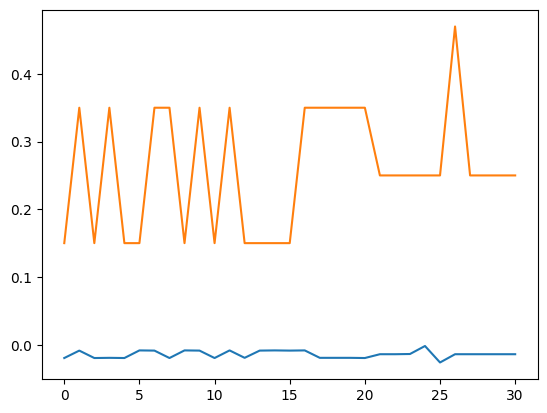

In [ ]:
@m.Expression(m.I)
def trm(m, i):
    return - m.ai[3]*m.Cfeed[i, "Mn"] - m.ai[4]*m.Cfeed[i, "Co"]  -m.ai[5]*m.Cfeed[i, "Cu"] - m.ai[6]*m.Cfeed[i, "Ni"]

plt.plot(m.trm[:]())
plt.plot(m.C_ex[:]())

# Outlier Detection

In [ ]:
!pip install scikit-learn

In [ ]:
data = df[[ 'pH_scaled','[D2EHPA] _scaled', '[Mn] (mol/L)_scaled', '[Co] (mol/L)_scaled',
       '[Ni] (mol/L)_scaled', '[Cu] (mol/L)_scaled', 'log D (obs)_Mn_scaled',
       'log D (obs)_Co_scaled'] ]

X = X_data = data.to_numpy()

/tmp/ipykernel_74280/2021683680.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


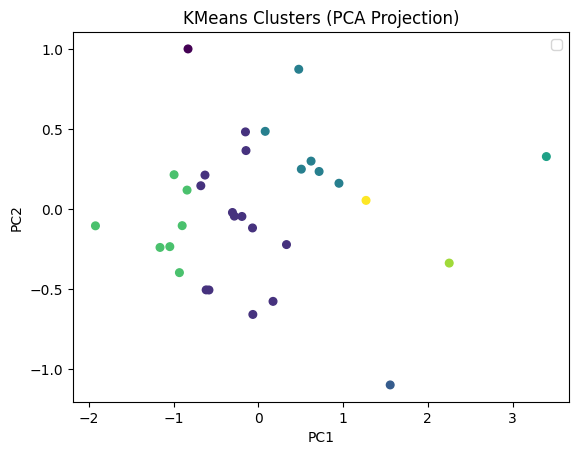

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_clusters = 5
# Fit KMeans
kmeans = KMeans(n_clusters=8)
labels = kmeans.fit_predict(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=30, cmap='viridis')
# plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters (PCA Projection)")
plt.legend()
plt.show()



In [ ]:
kmeans.transform(X)

array([[0.        , 1.39123655, 3.23173876, 1.66586245, 4.40503193,
        1.28691261, 3.45117309, 2.61822083],
       [1.65634004, 1.05296154, 1.73629607, 0.55138977, 3.18535646,
        1.76523066, 1.98489869, 1.3699643 ],
       [1.28280061, 0.99720507, 2.78558394, 1.81410327, 4.59981007,
        0.53282553, 3.40326961, 2.62618505],
       [1.80467384, 0.76306168, 1.69565449, 0.98380046, 3.32379134,
        1.54973729, 1.96950582, 1.36847055],
       [1.76000676, 1.08464855, 1.80548158, 0.40408698, 3.04183284,
        1.8675929 , 1.96446569, 1.14506291],
       [1.69118957, 1.7133534 , 3.66723732, 2.60003363, 5.439813  ,
        0.89874717, 4.21970283, 3.34178406],
       [1.66281231, 0.76577471, 2.26040058, 1.50568401, 4.28780264,
        0.93235221, 2.96435722, 2.19476969],
       [1.26166231, 0.86625621, 2.24433116, 0.64589836, 3.54633916,
        1.42666844, 2.4707667 , 1.5754843 ],
       [1.28828993, 0.75175985, 2.40273045, 1.02551399, 3.82306747,
        1.33226752, 2.564019

In [ ]:
labels

array([0, 3, 5, 1, 3, 5, 1, 3, 1, 2, 5, 5, 1, 3, 5, 3, 1, 7, 1, 6, 1, 4,
       5, 1, 5, 1, 1, 1, 3, 1, 1], dtype=int32)

In [ ]:

for i in range(n_clusters):
    print(i, np.where(labels == i))

0 (array([0]),)
1 (array([ 3,  6,  8, 12, 16, 18, 20, 23, 25, 26, 27, 29, 30]),)
2 (array([9]),)
3 (array([ 1,  4,  7, 13, 15, 28]),)
4 (array([21]),)


In [ ]:
99.99/(100-99.99)

9998.999999994885